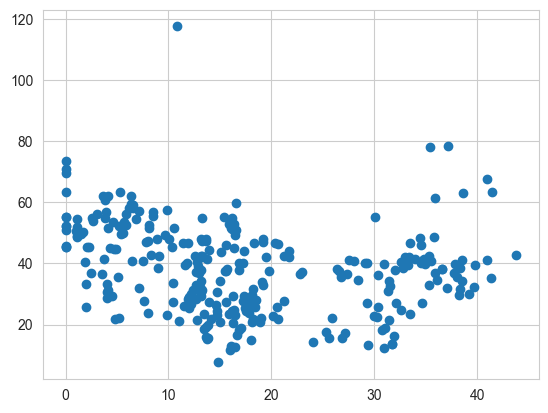

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from supervised_learning.regression import Regression
from supervised_learning.polynomial_regression import PolynomialRegression

from sklearn.model_selection import train_test_split
import seaborn as sns

df = pd.read_csv('../data/real_estate.csv')
X = df.drop('Y house price of unit area', axis=1)
y = df['Y house price of unit area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
# 只取X2 house age这一列
X_train = X_train['X2 house age']
X_test = X_test['X2 house age']
# to numpy
X_train = X_train.to_numpy().reshape(-1, 1)
X_test = X_test.to_numpy().reshape(-1, 1)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# print a chart of the X_train and y_train
plt.scatter(X_train, y_train)
plt.show()
# 这里我们认为，房龄越大，房价越低，应该存在线性回归关系
# 所以我们选择一个线性回归模型

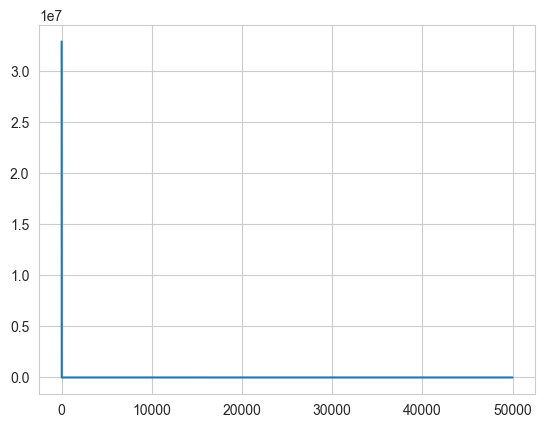

In [48]:

model = PolynomialRegression(50000,1e-9,3)
# X_train = X_train.reshape(-1,1)
# X_train.shape
# model.w.shape, X_train.shape, y_train.shape
model.fit(X_train, y_train)
# 看一下training_errors
plt.plot(model.training_errors)

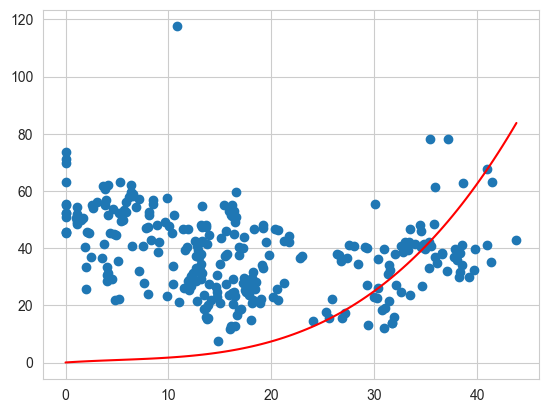

In [49]:
# 最后在plt上，将模型的曲线画出来
plt.scatter(X_train, y_train)
weights = model.w

# 生成一系列用于绘制拟合曲线的x值
x_values = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)

# 计算多项式函数的值
y_values = np.polyval(weights[::-1], x_values)  # 注意，weights需要反转，因为numpy.polyval的参数是从高阶到低阶的

plt.plot(x_values, y_values, c='r')